# Plotting function test

In [248]:
import math
from matplotlib import rc_context
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from osgeo import gdal
from pathlib import Path
import rasterio

In [15]:
gdal.UseExceptions()

### Plotting settings

In [2]:
# Define the location as lon,lat
# Bounding box: [-179.5,-50,5,85]
lon = -110
lat =   55

In [250]:
data_values = get_location_data_dict_from_geotiffs(file_paths,lon,lat)

In [255]:
figure_path = Path('/Users/wmk934/data/perceptual_models/data/geotiff_same_resolution/res_0.01/figures')
figure_name = f'res_0-01_lon-{lon}_lat-{lat}_X.png'
figure_path.mkdir(exist_ok=True, parents=True)

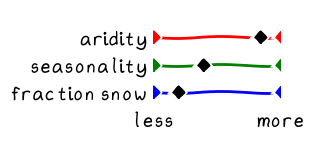

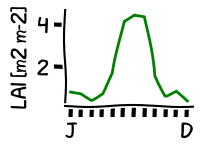

In [274]:
plot_data_for_location(figure_path,figure_name)

In [275]:
def plot_data_for_location(figure_path,figure_name):

    # Make the 3 plots
    plot_climate( figure_path / figure_name.replace('X.png','climate.png'))
    plot_lai(     figure_path / figure_name.replace('X.png','lai.png'))
    plot_overview(figure_path / figure_name.replace('X.png','overview.png'))

### Define variables of interest

In [251]:
# Forest height (GLCLU2020)
vegetation_height    = data_values['veg_height'] # [m]

# GLCLU2019
land_type1           = data_values['land_glclu'] # Categorical
land_type1_text      = glclu2019_dict[land_type1]

# MODIS-IGBP
land_type2           = data_values['land_igbp'] # Categorical
land_type2_text      = igbp_dict[land_type2]

# LGRIP30
land_agriculture     = 1 # Categorical. 0: water, 1: non-cropland, 2: irrigated, 3: rainfed
land_agriculture_txt = lgrip30_dict[land_agriculture]

# Modis
vegetation_lai       = np.array([data_values['lai_01'],data_values['lai_02'],data_values['lai_03'],
                                 data_values['lai_04'],data_values['lai_05'],data_values['lai_06'],
                                 data_values['lai_07'],data_values['lai_08'],data_values['lai_09'],
                                 data_values['lai_10'],data_values['lai_11'],data_values['lai_12']])

# Merit
topography_elevation = data_values['elev'] # [m.a.s.l.]
topography_slope     = math.tan(math.radians(data_values['slope'])) # [degrees] to [m m-1], derived
topography_aspect    = data_values['aspect'] # [degrees], derived

# Pelletier
soil_depth           = data_values['soil_depth'] # [m]

# Soilgrids
soil_layer_top       = [0.00, 0.05, 0.15, 0.30, 0.60, 1.00] # Top of layer depths [m]
soil_layer_bot       = [0.05, 0.15, 0.30, 0.60, 1.00, 2.00] # Bottom of layer depths in [m]
soil_sand            = [data_values['sand1']/1000, data_values['sand2']/1000, data_values['sand3']/1000,
                        data_values['sand4']/1000, data_values['sand5']/1000, data_values['sand6']/1000]
soil_silt            = [data_values['silt1']/1000, data_values['silt2']/1000, data_values['silt3']/1000,
                        data_values['silt4']/1000, data_values['silt5']/1000, data_values['silt6']/1000]
soil_clay            = [data_values['clay1']/1000, data_values['clay2']/1000, data_values['clay3']/1000,
                        data_values['clay4']/1000, data_values['clay5']/1000, data_values['clay6']/1000]

# WorldCLim
climate_aridity      = data_values['climate_im']
climate_seasonality  = data_values['climate_imr']
climate_snow         = data_values['climate_fs']

# Currently unused
geology = 0 # Glhymps 
lake = 0 # # Hydrolakes

### Plot

In [18]:
def get_pm_plot_color(object):

    '''Defines standard colors for objects in perceptual model plots'''

    if object == 'bedrock boundary': color = [0.3, 0.3, 0.3] # Dark-ish grey
    elif object == 'bedrock fracture': color = [0.7, 0.7, 0.7] # Light-ish grey
    elif object == 'surface': color = 'saddlebrown' # Brown
    elif object == 'soil':
        print('WARNING: soil is defined based on sand/silt/clay percentages and requires get_pm_soil_color()')
        color = None
    

    return color

In [281]:
def get_igbb_patch(land_type, veg_height):

    # We know we have an x-dimension of size 10 to work with
    # Y-dimension is dictated by veg_height
    # We'll plot everything 

    # Needleleaf forest (>60% trees)
    if (land_type == 1) or (land_type == 3):

    # Broadleaf forest (>60% trees)
    elif (land_type == 2) or (land_type == 4):

    # Mixed forest (>60% trees)
    elif land_type == 5:

    # Closed shrubland (>60% shrubs)
    elif land_type == 6:

    # Open shrubland (10-60% shrubs)
    elif land_type == 7:

    # Woody savanna (30-60% trees)
    elif land_type == 8:

    # Savanna (10-30% trees)
    elif land_type == 9:

    # Grassland 
    elif land_type == 10:

    # Permanent wetland
    elif land_type == 11:

    # Cropland
    elif land_type == 12:
        
    # Urban
    elif land_type == 13:

    # Cropland/natural mosaic
    elif land_type == 14:

    # Snow/ice
    elif land_type == 15:

    # Barren
    elif land_type == 16:
        land_patch = None

    # Water
    elif land_type == 17:

    return land_patch

IndentationError: expected an indented block after 'if' statement on line 8 (3432915117.py, line 11)

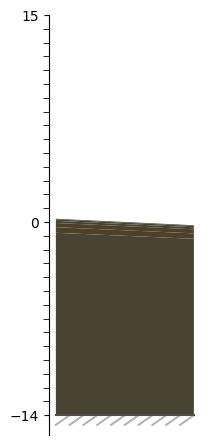

In [321]:
# Determine the spacing
bedrock_depth_factor = 1.05
bedrock_depth = soil_depth * bedrock_depth_factor
total_width  = 10 # [m]
total_height = vegetation_height + soil_depth + bedrock_depth # [m]
top = vegetation_height
bottom = 0-bedrock_depth
slope_l = 0.5*(topography_slope * total_width)
slope_r = -0.5*(topography_slope * total_width)
soil_depth_l = soil_depth + slope_l
soil_depth_r = soil_depth + slope_r

#with plt.xkcd():
    
# General figure components
fig = plt.figure(figsize=(8,6))
ax = fig.add_axes((0.1, 0.1, 0.7, 0.7)) # left, bottom, width, height   

# Specifics of the main figure
ax.set_aspect('equal') 
ax.spines[['top', 'right', 'bottom']].set_visible(False)
ax.set_xticks([])
ax.set_yticks([0-soil_depth,0,top])
ax.minorticks_on()
ax.tick_params(axis='y', which='minor', length=4)
ax.set_yticks(np.arange(0-soil_depth,top), minor=True)
plt.ylim([bottom*bedrock_shading_factor, top])

# Bedrock
n_bedrock_shading = 10
for x in np.linspace(0,total_width,n_bedrock_shading, endpoint=False):
    plt.plot([x,x+total_width/n_bedrock_shading],
             [bottom,0-soil_depth], 
             color=get_pm_plot_color('bedrock fracture'))
plt.plot([0,total_width],[0-soil_depth,0-soil_depth], color=get_pm_plot_color('bedrock boundary'))

# Soil
soil_text = 'Soil layer texture [%]\ndepth [m]  sand silt clay'
for ix,(soil_t,soil_b) in enumerate(zip(soil_layer_top,soil_layer_bot)): # SOILGRIDS layer loop
    if soil_depth >= soil_t: # the top of this soil layer is within estimated soil depth

        # Get the soil type in this layer
        sand = soil_sand[ix]; silt = soil_silt[ix]; clay = soil_clay[ix]
        _,soil_name = find_usda_soilclass(sand*100,silt*100,clay*100)
        soil_color = get_pm_soil_color(soil_name)

        # Check where the bottom of the plotting area is
        if soil_depth < soil_b: # Estimated depth ends before this soilgrids layer does
            soil_b = soil_depth # Therefore end the plotting layer at estimated soil depth

        # Handle the special case where estimated soil depth is deeper than deepest soil grid layer
        if soil_b == 2: 
            soil_b = soil_depth # extend this layer all the way to bedrock

        # Calculate at which fraction of total soil depth the layer interfaces are
        soil_t_frac = soil_t / soil_depth
        soil_b_frac = soil_b / soil_depth

        # Create a Polygon patch with the specified characteristics
        x = [total_width, total_width, 0, 0, total_width]
        y = [slope_r - soil_b_frac * soil_depth_r, slope_r - soil_t_frac * soil_depth_r,
             slope_l - soil_t_frac * soil_depth_l, slope_l - soil_b_frac * soil_depth_l,
             slope_r - soil_b_frac * soil_depth_r]
        soil_patch = patches.Polygon(
            xy=list(zip(x, y)),  # Combine x and y coordinates
            closed=True,  # Connect the last point to the first to close the shape
            facecolor=soil_color,
            edgecolor='none')  
        ax.add_patch(soil_patch)
   
plt.show()

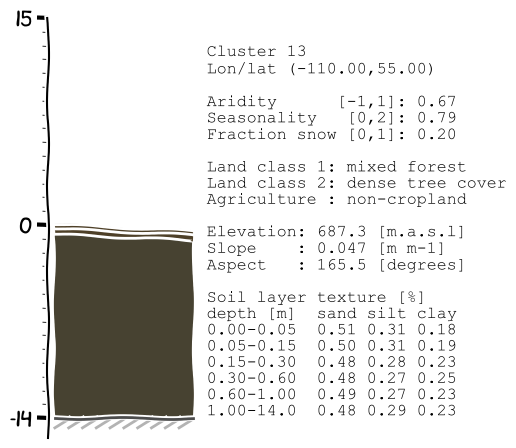

In [291]:
# General settings
text_settings = {'font.family': 'Courier New', 'font.size': 12}

# Determine the spacing
bedrock_depth_factor = 1.05
bedrock_depth = soil_depth * bedrock_depth_factor
total_width  = 10 # [m]
total_height = vegetation_height + soil_depth + bedrock_depth # [m]
top = vegetation_height
bottom = 0-bedrock_depth
slope_l = soil_depth + 0.5*(topography_slope * total_width)
slope_r = soil_depth - 0.5*(topography_slope * total_width)

with plt.xkcd():
    
    # General figure components
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_axes((0.1, 0.1, 0.7, 0.7)) # left, bottom, width, height   
    
    # Specifics of the main figure
    ax.set_aspect('equal') 
    ax.spines[['top', 'right', 'bottom']].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([0-soil_depth,0,top])
    ax.minorticks_on()
    ax.tick_params(axis='y', which='minor', length=4)
    ax.set_yticks(np.arange(0-soil_depth,top), minor=True)
    plt.ylim([bottom*bedrock_shading_factor, top])

    # Land use
    # We'll primarily use IGBP categories here (land_type2)
    #land_patch = get_igbb_patch(land_type2, vegetation_height)
    #if land_patch: ax.add_patch(land_patch) # "Barren" returns a None type land_patch, which we don't plot
    
    # Bedrock
    n_bedrock_shading = 10
    for x in np.linspace(0,total_width,n_bedrock_shading, endpoint=False):
        plt.plot([x,x+total_width/n_bedrock_shading],
                 [bottom,0-soil_depth], 
                 color=get_pm_plot_color('bedrock fracture'))
    plt.plot([0,total_width],[0-soil_depth,0-soil_depth], color=get_pm_plot_color('bedrock boundary'))
    
    # Surface
    #plt.plot([0,total_width],[slope_l,slope_r], color=get_pm_plot_color('surface'))
    
    # Soil
    soil_text = 'Soil layer texture [%]\ndepth [m]  sand silt clay'
    for ix,(soil_t,soil_b) in enumerate(zip(soil_layer_top,soil_layer_bot)): # SOILGRIDS layer loop
        if soil_depth >= soil_t: # the top of this soil layer is within estimated soil depth
    
            # Get the soil type in this layer
            sand = soil_sand[ix]
            silt = soil_silt[ix]
            clay = soil_clay[ix]
            _,soil_name = find_usda_soilclass(sand*100,silt*100,clay*100)
            soil_color = get_pm_soil_color(soil_name)

            # Check where the bottom of the plotting area is
            if soil_depth < soil_b: # Estimated depth ends before this soilgrids layer does
                soil_b = soil_depth # Therefore end the plotting layer at estimated soil depth
    
            # Handle the special case where estimated soil depth is deeper than deepest soil grid layer
            if soil_b == 2: 
                soil_b = soil_depth # extend this layer all the way to bedrock
    
            # Calculate at which fraction of total soil depth the layer interfaces are
            soil_t_frac = soil_t / soil_depth
            soil_b_frac = soil_b / soil_depth

            # Create a Polygon patch with the specified characteristics
            x = [total_width, total_width, 0, 0, total_width]
            y = [(1-soil_b_frac) * slope_r - soil_depth, (1-soil_t_frac) * slope_r - soil_depth, 
                 (1-soil_t_frac) * slope_l - soil_depth, (1-soil_b_frac) * slope_l - soil_depth,
                 (1-soil_b_frac) * slope_r - soil_depth]
            soil_patch = patches.Polygon(
                xy=list(zip(x, y)),  # Combine x and y coordinates
                closed=True,  # Connect the last point to the first to close the shape
                facecolor=soil_color,
                edgecolor='none'#,
                #linestyle='dotted',
                #linewidth=1.0  # Width of the outline
            )  
            ax.add_patch(soil_patch)
            
            # Append the annotation before we start to update soil_b
            b_decimals = 3-len(str(int(soil_b)))
            soil_text += f'\n{soil_t:3.2f}-{soil_b:3.{b_decimals}f}  {sand:.2f} {silt:.2f} {clay:.2f}'
       
    # Text
    clus_num = data_values['cluster_num']

    clim_text = (f'Aridity      [-1,1]: {climate_aridity:3.2f}\n'
                 f'Seasonality   [0,2]: {climate_seasonality:3.2f}\n'
                 f'Fraction snow [0,1]: {climate_snow:3.2f}')
    land_text = (f'Land class 1: {land_type2_text}\n'
                 f'Land class 2: {land_type1_text}\n'
                 f'Agriculture : {land_agriculture_txt}')
    topo_text = (f'Elevation: {topography_elevation:4.1f} [m.a.s.l]\n'
                 f'Slope    : {topography_slope:4.3f} [m m-1]\n'
                 f'Aspect   : {topography_aspect:4.1f} [degrees]')
    all_text = (f'Cluster {clus_num}\n'
                f'Lon/lat ({lon:5.2f},{lat:5.2f})\n\n'
                f'{clim_text}\n\n'
                f'{land_text}\n\n'
                f'{topo_text}\n\n'
                f'{soil_text}')
    with rc_context(text_settings):
        ax.text(total_width+1, 0-soil_depth, all_text, ha='left', va='bottom')
    
    plt.show()

### File specification

In [249]:
# Files
base_path = Path('/Users/wmk934/data/perceptual_models/data/geotiff_same_resolution/res_0.01/')
file_paths = [['cluster_num', base_path / 'clustering/res_0-01_mask-MERIT_datasets-29_reruns-10/res_0-01_datasets-29_clusters-15_reruns-10.tif'],              ['climate_fs', base_path / 'worldclim/wc2.1_30s_climate_index_fs_resampled.tif'],
              ['climate_im', base_path / 'worldclim/wc2.1_30s_climate_index_im_resampled.tif'],
              ['climate_imr', base_path / 'worldclim/wc2.1_30s_climate_index_imr_resampled.tif'],
              ['lai_01', base_path / 'lai/2013_2023_01_MOD_Grid_MOD15A2H_Lai_500m_resampled.tif'],
              ['lai_02', base_path / 'lai/2013_2023_02_MOD_Grid_MOD15A2H_Lai_500m_resampled.tif'],
              ['lai_03', base_path / 'lai/2013_2023_03_MOD_Grid_MOD15A2H_Lai_500m_resampled.tif'],
              ['lai_04', base_path / 'lai/2013_2023_04_MOD_Grid_MOD15A2H_Lai_500m_resampled.tif'],
              ['lai_05', base_path / 'lai/2013_2023_05_MOD_Grid_MOD15A2H_Lai_500m_resampled.tif'],
              ['lai_06', base_path / 'lai/2013_2023_06_MOD_Grid_MOD15A2H_Lai_500m_resampled.tif'],
              ['lai_07', base_path / 'lai/2013_2023_07_MOD_Grid_MOD15A2H_Lai_500m_resampled.tif'],
              ['lai_08', base_path / 'lai/2013_2023_08_MOD_Grid_MOD15A2H_Lai_500m_resampled.tif'],
              ['lai_09', base_path / 'lai/2013_2023_09_MOD_Grid_MOD15A2H_Lai_500m_resampled.tif'],
              ['lai_10', base_path / 'lai/2013_2023_10_MOD_Grid_MOD15A2H_Lai_500m_resampled.tif'],
              ['lai_11', base_path / 'lai/2013_2023_11_MOD_Grid_MOD15A2H_Lai_500m_resampled.tif'],
              ['lai_12', base_path / 'lai/2013_2023_12_MOD_Grid_MOD15A2H_Lai_500m_resampled.tif'],
              ['veg_height', base_path / 'forest_height/forest_height_2020_resampled.tif'],
              ['land_glclu', base_path / 'glclu2019/glclu2019_map_resampled.tif'],
              ['land_igbp', base_path / 'modis_land/2013_2022_mode_MCD12Q1_LC_Type1_resampled.tif'],
              ['agriculture', base_path / 'lgrip30/lgrip30_agriculture_resampled.tif'],
              ['aspect', base_path / 'merit/merit_hydro_aspect_resampled.tif'],
              ['slope', base_path / 'merit/merit_hydro_slope_resampled.tif'],
              ['elev', base_path / 'merit/merit_hydro_elv_resampled.tif'],
              ['clay1', base_path / 'soilgrids/clay_0-5cm_mean_resampled.tif'],
              ['clay2', base_path / 'soilgrids/clay_5-15cm_mean_resampled.tif'],
              ['clay3', base_path / 'soilgrids/clay_15-30cm_mean_resampled.tif'],
              ['clay4', base_path / 'soilgrids/clay_30-60cm_mean_resampled.tif'],
              ['clay5', base_path / 'soilgrids/clay_60-100cm_mean_resampled.tif'],
              ['clay6', base_path / 'soilgrids/clay_100-200cm_mean_resampled.tif'],
              ['sand1', base_path / 'soilgrids/sand_0-5cm_mean_resampled.tif'],
              ['sand2', base_path / 'soilgrids/sand_5-15cm_mean_resampled.tif'],
              ['sand3', base_path / 'soilgrids/sand_15-30cm_mean_resampled.tif'],
              ['sand4', base_path / 'soilgrids/sand_30-60cm_mean_resampled.tif'],
              ['sand5', base_path / 'soilgrids/sand_60-100cm_mean_resampled.tif'],
              ['sand6', base_path / 'soilgrids/sand_100-200cm_mean_resampled.tif'],
              ['silt1', base_path / 'soilgrids/silt_0-5cm_mean_resampled.tif'],
              ['silt2', base_path / 'soilgrids/silt_5-15cm_mean_resampled.tif'],
              ['silt3', base_path / 'soilgrids/silt_15-30cm_mean_resampled.tif'],
              ['silt4', base_path / 'soilgrids/silt_30-60cm_mean_resampled.tif'],
              ['silt5', base_path / 'soilgrids/silt_60-100cm_mean_resampled.tif'],
              ['silt6', base_path / 'soilgrids/silt_100-200cm_mean_resampled.tif'],
              ['soil_depth', base_path / 'pelletier/average_soil_and_sedimentary-deposit_thickness_resampled.tif']
]

### Plotting functions

In [273]:
def plot_xkcd_climate(save_file):
    with plt.xkcd():
    
        c_im = data_values['climate_im']
        c_imr = data_values['climate_imr']
        c_fs = data_values['climate_fs']
    
        fig = plt.figure()
        ax = fig.add_axes((0.4, 0.4, 0.2, 0.2))
        ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)
        ax.set_ylim([0.5, 4])
        ax.set_xlim([0, 2])
        ax.set_xticks([0,2])
        ax.set_yticks([1,2,3])
        ax.set_xticklabels(['less','more'])
        ax.set_yticklabels(['fraction snow','seasonality','aridity'])
        ax.tick_params(axis='both', length=0)
        
        ax.plot([0,2],[1,1], color='blue', marker='D')
        ax.plot([0,2],[2,2], color='green', marker='D')
        ax.plot([0,2],[3,3], color='red', marker='D') 
        ax.plot([c_fs*2,c_fs*2],[1,1], color='black', marker='D') # scale [0,1] to [0,2]
        ax.plot([c_imr,c_imr],[2,2],   color='black', marker='D') # no scaling, already on [0,2]
        ax.plot([c_im+1,c_im+1],[3,3], color='black', marker='D') # scale [-1,1] to [0,2]
        plt.savefig(save_file, dpi=300)
        plt.show()        

In [268]:
def plot_xkcd_lai(save_file):
    with plt.xkcd():
    
        fig = plt.figure()
        ax = fig.add_axes((0.1, 0.1, 0.2, 0.2))
        ax.spines[['top', 'right']].set_visible(False)
        
        ax.plot(vegetation_lai, color='green')
        ax.set_ylabel('LAI [m2 m-2]')
        ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11])
        ax.set_xticklabels(['J','','','','','','','','','','','D'])
        plt.savefig(save_file, dpi=300)
        plt.show()        

### Plotting Support

In [234]:
lgrip30_dict = dict([(0, 'water'),
                     (1, 'non-cropland'),
                     (2, 'irrigated cropland'),
                     (3, 'rain-fed cropland')])

In [238]:
glclu2019_dict = dict([(1,  'true desert'),
                       (2,  'semi-arid'),
                       (3,  'dense short vegetation'),
                       (4,  'open tree cover'),
                       (5,  'dense tree cover'),
                       (6,  'tree cover gain'),
                       (7,  'tree cover loss, not fire'),
                       (8,  'salt pan'),
                       (9,  'wetland sparse vegetation'),
                       (10, 'wetland dense short vegetation'),
                       (11, 'wetland open tree cover'),
                       (12, 'wetland dense tree cover'),
                       (13, 'wetland tree cover gain'),
                       (14, 'wetland tree cover loss, not fire'),
                       (15, 'ice'),
                       (16, 'water'),
                       (17, 'cropland'),
                       (18, 'built-up'),
                       (19, 'ocean'),
                       (20, 'no data')])

In [239]:
igbp_dict = dict([(1,  'evergreen needleleaf forest'),
                  (2,  'evergreen broadleaf forest'),
                  (3,  'deciduous needleleaf forest'),
                  (4,  'deciduous broadleaf forest'),
                  (5,  'mixed forest'),
                  (6,  'closed shrublands'),
                  (7,  'open shrublands'),
                  (8,  'woody savannas'),
                  (9,  'savannas'),
                  (10, 'grasslands'),
                  (11, 'permanent wetlands'),
                  (12, 'croplands'),
                  (13, 'urban and built-up land'),
                  (14, 'cropland/natural mosaic'),
                  (15, 'permanent snow/ice'),
                  (16, 'barren'),
                  (17, 'water'),
                  (255,'unclassified')])

In [20]:
def find_usda_soilclass(sand,silt,clay,no_data_value=255):

    # Adapted from: Knoben (2021)
    # Knoben, W. J. M. (2021). Global USDA-NRCS soil texture class map, 
    # HydroShare, https://doi.org/10.4211/hs.1361509511e44adfba814f6950c6e742
    
    # Based on Benham et al., 2009 and matching the following soil class table:
    # SUMMA-ROSETTA-STAS-RUC soil parameter table
    # 1  'CLAY' 
    # 2  'CLAY LOAM'
    # 3  'LOAM' 
    # 4  'LOAMY SAND'
    # 5  'SAND'
    # 6  'SANDY CLAY'
    # 7  'SANDY CLAY LOAM'
    # 8  'SANDY LOAM'
    # 9  'SILT'
    # 10 'SILTY CLAY'
    # 11 'SILTY CLAY LOAM'
    # 12 'SILT LOAM'

    # Check inputs
    if (sand<=1) & (silt<=1) & (clay<=1):
        print(f'WARNING: find_usda_soilclass(): sand, silt and clay all < 1. Please provide inputs in % [0,100].')
        return
    
    # Legend
    soiltype = ['clay','clay loam','loam','loamy sand','sand','sandy clay','sandy clay loam',
                'sandy loam','silt','silty clay','silty clay loam','silt loam']
    
    # Classify
    if (clay >= 40) & (sand <= 45) & (silt < 40):
        soilclass = 1
    elif (clay >= 27) & (clay < 40) & (sand > 20) & (sand <= 45):
        soilclass = 2
    elif (clay >= 7) & (clay < 27) & (silt >= 28) & (silt < 50) & (sand < 52):
        soilclass = 3
    elif ((silt + 1.5 * clay) >= 15) & ((silt + 2* clay) < 30):
        soilclass = 4
    elif ((silt + 1.5 * clay) < 15):
        soilclass = 5
    elif (clay >= 35 )& (sand > 45):
        soilclass = 6
    elif (clay >= 20) & (clay < 35) & (silt < 28) & (sand > 45):
        soilclass = 7
    elif ((clay >= 7) & (clay < 20) & (sand > 52) & ((silt+2*clay) >= 30)) | ((clay < 7) & (silt < 50) & ((silt+2*clay >= 30))):
        soilclass = 8
    elif (silt >= 80) & (clay < 12):
        soilclass = 9
    elif (clay >= 40) & (silt >= 40):
        soilclass = 10
    elif (clay >= 27) & (clay < 40) & (sand <= 20):
        soilclass = 11
    elif ((silt >= 50) & (clay >= 12) & (clay < 27)) | ((silt >= 50) & (silt < 80) & (clay < 12)):
        soilclass = 12
    elif (sand == no_data_value) | (silt == no_data_value) | (clay == no_data_value):
        soilclass = 0

    soilname = 'undefined'
    if soilclass > 0:
        soilname = soiltype[soilclass-1] # -1 to match 0-based indexing
    
    return soilclass, soilname

In [21]:
def get_pm_soil_color(soil_name):

    '''Creates a soil color for a give sand/silt/clay percentage'''

    # Color source: https://kremesti.com/water/silt_clay_mud.htm (accessed 2023-11-27)
    if soil_name == 'clay':
        color = [97,62,38]
    elif soil_name == 'clay loam':
        color = [68,45,30]
    elif soil_name == 'loam':
        color = [71,66,49]
    elif soil_name == 'loamy sand':
        color = [66,61,41]
    elif soil_name == 'sand':
        color = [91,87,67]
    elif soil_name == 'sandy clay':
        color = [85,82,71]
    elif soil_name == 'sandy clay loam':
        color = [78,64,40]
    elif soil_name == 'sandy loam':
        color = [74,71,42]
    elif soil_name == 'silt':
        color = [48,48,48]
    elif soil_name == 'silty clay':
        color = [73,52,39]
    elif soil_name == 'silty clay loam':
        color = [61,52,47]
    elif soil_name == 'silt loam':
        color = [88,83,77]
    else:
        print(f'WARNING: get_pm_soil_color(): soil {soil_name} not defined.')
        color = None
    return [C/255 for C in color]    

### Data extraction functions

In [4]:
def get_geotiff_properties(file):

    with rasterio.open(file) as src:
        geoTransform = src.transform
        pixelSize = [geoTransform[0],geoTransform[4]]
        rasterSize = [src.width,src.height]
        boundingBox = src.bounds
    
    return pixelSize, rasterSize, boundingBox

In [5]:
def get_geotif_data_as_array(file, band=1):
    ds = gdal.Open(file) # open the file
    band = ds.GetRasterBand(band) # get the data band
    data = band.ReadAsArray() # convert to numpy array for further manipulation   
    return data

In [6]:
def get_geotif_noData(src_file, band=1):
    src_ds = gdal.Open(src_file)
    src_band = src_ds.GetRasterBand(band)
    no_data_value = src_band.GetNoDataValue()
    src_ds = None
    return no_data_value

In [7]:
def confirm_dimensions_match(files):
    pixel_sizes = []
    raster_sizes = []
    bounding_boxes = []
    
    for sub_list in files:
        file = sub_list[1]
        pixel, raster, bb = get_geotiff_properties(file)
        pixel_sizes.append(pixel)
        raster_sizes.append(raster)
        bounding_boxes.append(bb)

    assert all([sub_list == pixel_sizes[0] for sub_list in pixel_sizes]), 'pixel sizes don''t match'
    assert all([sub_list == raster_sizes[0] for sub_list in raster_sizes]), 'raster sizes don''t match'
    assert all([sub_list == bounding_boxes[0] for sub_list in bounding_boxes]), 'bounding boxes don''t match'

In [8]:
def extract_pixel_value(tiff_path, pixel_x, pixel_y):

    file = str(tiff_path)
    
    # Get data
    with rasterio.open(file) as src:
        pixel_value = src.read(1, window=((pixel_y-1, pixel_y), (pixel_x-1, pixel_x)))
        pixel_value = pixel_value[0][0]

    # Get scaling and offset
    src = gdal.Open(file)
    scale_factor = src.GetRasterBand(1).GetScale()
    offset = src.GetRasterBand(1).GetOffset()
    if scale_factor: pixel_value = pixel_value * scale_factor
    if offset: pixel_value = pixel_value + offset
    src = None
    
    return pixel_value # Extract the actual value from the array

In [13]:
# Main: called from get_location_data_dict_from_geotiffs()
def convert_lat_lon_to_raster_x_y(file,lat,lon):
    pixel, raster, bb = get_geotiff_properties(file)
    assert is_point_inside_bbox((lon,lat),bb), f'({lon},{lat}) not in {bb}' # sub 1
    x,y = lon_lat_to_pixel(lon,lat, pixel[0], raster, bb) # sub 2
    return x,y

# Sub 1
def is_point_inside_bbox(point, bbox):
    x, y = point
    min_x, min_y, max_x, max_y = bbox.left, bbox.bottom, bbox.right, bbox.top
    return min_x <= x <= max_x and min_y <= y <= max_y

# Sub 2
def lon_lat_to_pixel(lon, lat, pixel_size, raster_size, bounding_box):
    # Calculate pixel coordinates
    x = int((lon - bounding_box.left) / pixel_size)
    y = int((bounding_box.top - lat) / pixel_size)

    # Ensure the coordinates are within the raster bounds
    x = max(0, min(x, raster_size[0] - 1))
    y = max(0, min(y, raster_size[1] - 1))

    return x,y

In [10]:
def get_location_data_dict_from_geotiffs(files,lon,lat):

    # Confirm the all rasters have the same dimension (function will error out if not)
    confirm_dimensions_match(files)
    
    # Get the raster indices for the provided lat/lon coordinates
    x,y = convert_lat_lon_to_raster_x_y(files[0][1],lat,lon)

    # Get the data values we want
    data_dict = {}
    for sublist in files:
        data_name,data_file = sublist
        data_value = extract_pixel_value(data_file,x,y)
        data_dict[data_name] = data_value    
    
    return data_dict